<a href="https://colab.research.google.com/github/edotheepic/ComVis/blob/main/2440007226_ASSIGNMENT_02_COMP7116001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT LIBRARIES & IMAGES

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/image6.jpg
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/repetitiveNoiseImage3.jpg

--2022-10-18 07:43:01--  https://raw.githubusercontent.com/edotheepic/ComVis/main/image6.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294279 (287K) [image/jpeg]
Saving to: ‘image6.jpg.1’

image6.jpg.1        100%[===================>] 287.38K  --.-KB/s    in 0.02s   

2022-10-18 07:43:01 (11.8 MB/s) - ‘image6.jpg.1’ saved [294279/294279]

--2022-10-18 07:43:01--  https://raw.githubusercontent.com/edotheepic/ComVis/main/repetitiveNoiseImage3.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8862 (8.7K) [image/jpeg]
Saving 

### READ IMAGE

#### Read & Show image raw image

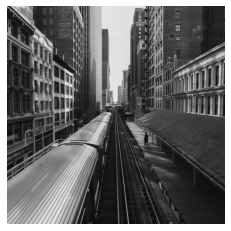

In [2]:
#Read Image in grayscale
img = cv.imread('image6.jpg', 0)

#Show raw image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

#### Convert image to frequency domain using Fourier Transform (`fft2()`)

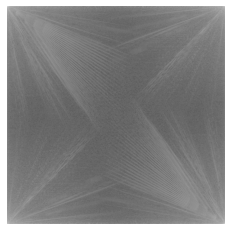

In [3]:
#Apply Fourier Transform
img_f = np.fft.fft2(img)

plt.imshow(np.log1p(abs(img_f)), cmap='gray')
plt.axis('off')
plt.show()

#### Shift the low frequency from the edge to the center using `fftshift()`

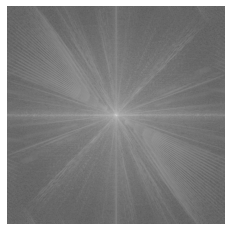

In [4]:
#Shift Low frequency to the center
img_fshift = np.fft.fftshift(img_f)

#Show Fourier Spectrum of the image
plt.imshow(np.log1p(abs(img_fshift)), cmap='gray')
plt.axis('off')
plt.show()

### LOW PASS FILTERING



#### Create Gaussian Low Pass Filter

>M,N is the size of the image
>
>LPF is the filter that will be applied to the image
>
>D0 is the size of the filter, smaller value will create a more blurry image

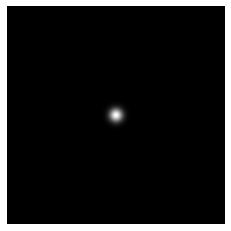

In [5]:
M,N = img.shape
#Create Gaussian Low Pass Filter
LPF = np.zeros((M,N), dtype=np.float32)
D0 = 25
for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    LPF[u,v] = np.exp(-D**2/(2*D0*D0))

#Show the filter
plt.figure()
plt.imshow(LPF, cmap='gray')
plt.axis('off')
plt.show()

####Apply Low pass filtering to image

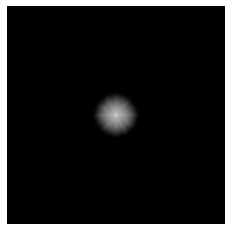

In [6]:
#Apply filter to image
LP_img_fshift = img_fshift * LPF

#Show frequency domain image with filter
plt.imshow(np.log1p(abs(LP_img_fshift)), cmap='gray')
plt.axis('off')
plt.show()

#### Reverse shift the low frequencies back to the edges using `ifftshift()`

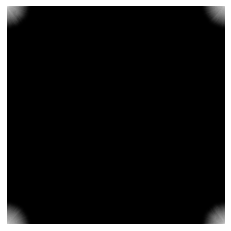

In [7]:
#Reverse shift
LP_img_f = np.fft.ifftshift(LP_img_fshift)

#Show reverse shifted image
plt.imshow(np.log1p(abs(LP_img_f)), cmap='gray')
plt.axis('off')
plt.show()

#### Convert the image back to the spatial domain using inverse fourier transform (`ifft2()`)

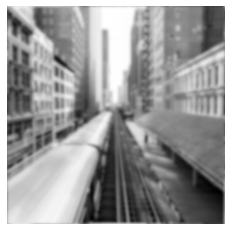

In [8]:
#Apply Inverse Fourier Transform
LP_img = np.fft.ifft2(LP_img_f)

#Show image with low pass filter
plt.imshow(np.log1p(abs(LP_img)), cmap='gray')
plt.axis('off')
plt.show()

#### Compare Original & Filtered Image

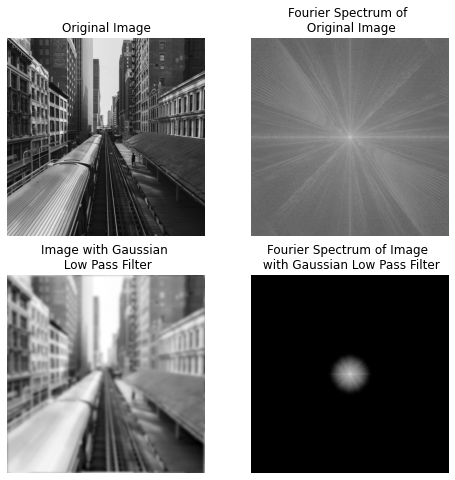

In [9]:
plt.figure(1, (8, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log1p(abs(img_fshift)), cmap='gray')
plt.title('Fourier Spectrum of \n Original Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(abs(LP_img)), cmap='gray')
plt.title('Image with Gaussian \n Low Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.log1p(abs(LP_img_fshift)), cmap='gray')
plt.title('Fourier Spectrum of Image \n with Gaussian Low Pass Filter')
plt.axis('off')

plt.show()

### HIGH PASS FILTERING


#### Create Gaussian High Pass Filter

To create a high pass filter, use formula `High Pass Filter = 1 - Low Pass Filter`


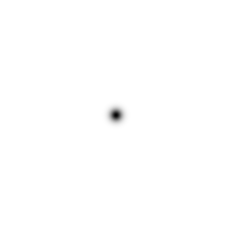

In [10]:
#Create Gaussian High Pass Filter
HPF = 1 - LPF

#Show the filter
plt.imshow(np.log1p(abs(HPF)), cmap='gray')
plt.axis('off')
plt.show()

#### Apply High Pass filtering to image

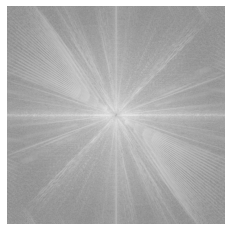

In [11]:
#Apply high pass filter
HP_img_fshift = img_fshift * HPF

#Show frequency domain after filter
plt.imshow(np.log1p(abs(HP_img_fshift)), cmap='gray')
plt.axis('off')
plt.show()

#### Convert the image back

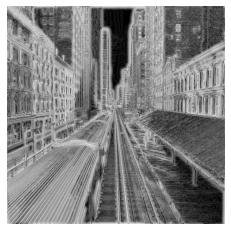

In [12]:
#Reverse shift
HP_img_f = np.fft.ifftshift(HP_img_fshift)

#Apply Inverse Fourier Transform
HP_img = np.fft.ifft2(HP_img_f)

#Show image with high pass filter
plt.imshow(np.log1p(abs(HP_img)), cmap='gray')
plt.axis('off')
plt.show()

#### Compare Original & Filtered Image

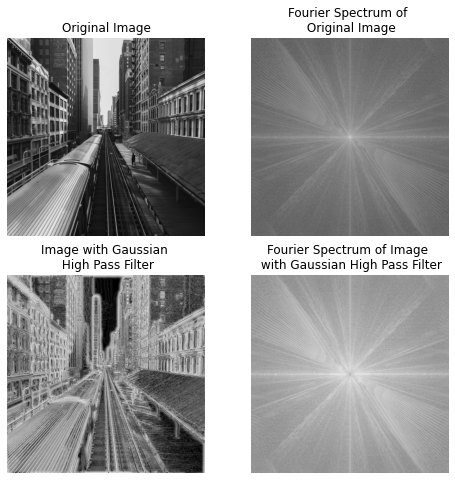

In [13]:
plt.figure(2, (8, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log1p(abs(img_fshift)), cmap='gray')
plt.title('Fourier Spectrum of \n Original Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(abs(HP_img)), cmap='gray')
plt.title('Image with Gaussian \n High Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.log1p(abs(HP_img_fshift)), cmap='gray')
plt.title('Fourier Spectrum of Image \n with Gaussian High Pass Filter')
plt.axis('off')

plt.show()

### BUTTERWORTH NOTCH FILTERING

#### Read Image with repetitive noise

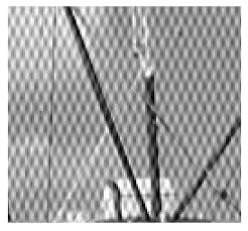

In [14]:
#Read image
noisy_img = cv.imread('repetitiveNoiseImage3.jpg', 0)

#Show image
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')
plt.show()

#### Convert image to frequency domain

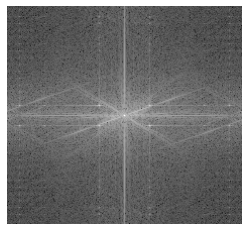

In [15]:
#Apply fourier transform
noisy_img_f = np.fft.fft2(noisy_img)

#Shift low frequency to center
noisy_img_fshift = np.fft.fftshift(noisy_img_f)

#Show transformed image
plt.imshow(np.log1p(abs(noisy_img_fshift)), cmap='gray')
plt.axis('off')
plt.show()

#### Create Function for creating butterworth notch filter

>`P,Q` = shape of image
>
>`H` = variable to store the filter
>
>`n` = order of the filter

In [16]:
def butterworth_notch_filter(img_shape, D0, u_k, v_k):
    P, Q = img_shape
    H = np.zeros((P, Q))
    n = 1
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point (u,v) to (u_k,v_k)
            D = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            # butterworth filter formula
            H[u, v] = (1.0 / (1 + (D0/D)**(2*n))) 
    return H

#### Create & apply the Butterworth Notch Filter

Call `butterworth_notch_filter(img_shape, D0, u_k, v_k)` for every frequency peak in the image (can be seen as bright white spots)

>`img_shape` = size of the image
>
>`D0` = size of the filter
>
>`u_k` = y coordinate value of the filter
>
>`v_k` = x coordinate value of the filter

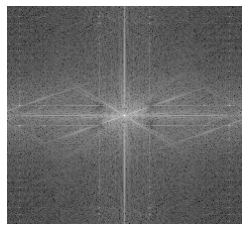

In [17]:
#get shape of image
img_shape = noisy_img.shape

#create an individual filter for each frequency peak that needs to be filtered
H1 = butterworth_notch_filter(img_shape, 5, 10, 25)
H2 = butterworth_notch_filter(img_shape, 5, 10, -25)
H3 = butterworth_notch_filter(img_shape, 5, -10, 25)
H4 = butterworth_notch_filter(img_shape, 5, -10, -25)

#Combine the individual filters
NotchFilter = H1*H2*H3*H4

#Apply filter to image
NF_noisy_img_fshift = noisy_img_fshift * NotchFilter

plt.imshow(np.log1p(abs(NF_noisy_img_fshift)), cmap='gray')
plt.axis('off')
plt.show()

#### Convert the image back

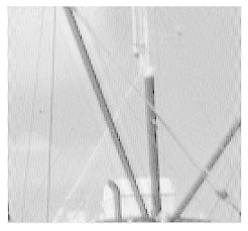

In [18]:
#Convert image back
NF_noisy_img_f = np.fft.ifftshift(NF_noisy_img_fshift)
NF_noisy_img = np.fft.ifft2(NF_noisy_img_f)

#Show filtered image
plt.imshow(np.log1p(abs(NF_noisy_img)), cmap='gray')
plt.axis('off')
plt.show()

#### Compare Original & Filtered Image

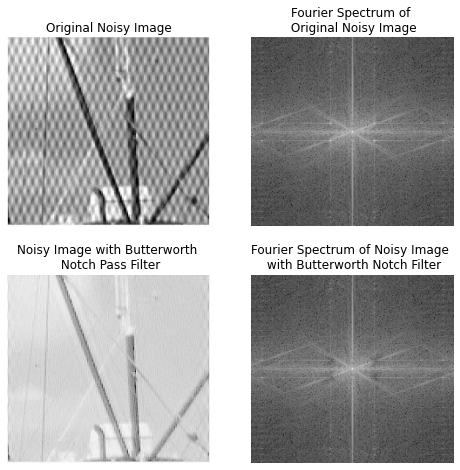

In [19]:
plt.figure(3, (8, 8))

plt.subplot(2, 2, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log1p(abs(noisy_img_fshift)), cmap='gray')
plt.title('Fourier Spectrum of \n Original Noisy Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(abs(NF_noisy_img)), cmap='gray')
plt.title('Noisy Image with Butterworth \n Notch Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.log1p(abs(NF_noisy_img_fshift)), cmap='gray')
plt.title('Fourier Spectrum of Noisy Image \n with Butterworth Notch Filter')
plt.axis('off')

plt.show()